In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data = pd.read_csv('/Users/jessiexiong/Desktop/preprocessed-2/test-c.csv')
data

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,45.42516,33.34461,23.31958,23.34270,6.63326,14.77993,4.17320,4.45086,38.79945,14.18269,...,0.37657,0.48871,0.12983,0.08526,0.05969,0.03717,0.04492,0.03919,0.02518,1.0
1,-463.79596,-443.02545,-255.43560,-248.47665,16.13994,16.44640,15.79093,19.21510,-467.48565,-452.63764,...,0.04304,0.06951,0.01951,0.01113,0.00756,0.01500,0.00810,0.00426,0.01575,1.0
2,29.44698,42.13613,20.47633,20.50934,1.54089,9.39235,1.62148,0.14163,23.88488,30.63569,...,0.13883,0.17905,0.04964,0.02906,0.02041,0.01594,0.01264,0.00621,0.01118,1.0
3,-489.69627,-475.15953,-398.33973,-393.85543,1.99412,-0.50832,-0.84127,-0.27385,-490.04709,-471.57063,...,0.07253,0.09549,0.01729,0.01128,0.01488,0.00900,0.00988,0.00355,0.02133,0.0
4,-193.03236,-122.47337,-99.04231,-232.68074,-659.88287,-533.55739,-314.82419,-567.21070,-43.46015,114.06686,...,0.00580,0.01337,0.00847,0.00596,0.00827,0.00538,0.00690,0.00734,0.00544,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.93904,-95.19199,-23.99057,-33.53363,-17.02186,-5.60064,6.48398,1.89498,56.08513,-79.66816,...,0.15332,0.21340,0.06783,0.03793,0.03000,0.02160,0.01849,0.01454,0.00849,0.0
1172,-449.01873,-432.39870,-240.15549,-228.99454,99.03163,65.81240,100.65670,86.58575,-541.24722,-481.01461,...,0.02830,0.03006,0.00831,0.01078,0.00294,0.00175,0.00150,0.00155,0.00783,1.0
1173,41.18643,-0.97395,5.62024,-6.23977,-5.27215,6.06751,0.40187,0.32220,45.87448,-2.75513,...,0.05710,0.07942,0.01492,0.00937,0.01122,0.00648,0.01256,0.00147,0.01562,0.0
1174,31.50616,-19.40820,3.81515,0.49181,6.25126,-4.49345,15.14498,-1.34301,46.99476,1.49974,...,0.06124,0.08625,0.02979,0.01692,0.00757,0.01169,0.00256,0.00727,0.01005,1.0


In [5]:
data['Label'].value_counts()

1.0    588
0.0    588
Name: Label, dtype: int64

In [6]:
label_mapping = {'Relaxed': 0, 'Concentrated': 1}

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [9]:
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
246,-921.12661,-536.63737,-142.64642,-1024.93431,-321.91518,194.23327,681.38894,-304.45504,-525.92451,-561.06758,...,0.00065,0.00307,0.00752,0.00803,0.00150,0.00493,0.00413,0.00485,0.00742,0.00547
1009,42.89114,23.24061,19.32536,14.99851,-13.64144,-10.17691,-4.54096,-3.62654,51.98195,28.33604,...,0.12141,0.31303,0.41220,0.12062,0.06713,0.04883,0.04600,0.02889,0.02351,0.02205
431,-524.31908,-506.81217,-415.56699,-410.46622,-27.52965,-26.49219,-14.80439,-16.05090,-474.34402,-468.70824,...,0.04054,0.09940,0.14277,0.04210,0.01779,0.01595,0.01501,0.00633,0.00418,0.00640
102,24.66718,-95.40637,-5.71885,-15.48877,-9.93879,5.04719,29.89507,34.00656,42.94452,-91.98862,...,0.01918,0.04220,0.29819,0.02520,0.01411,0.01411,0.00532,0.00893,0.00715,0.00540
308,-435.67967,-333.60667,-219.14470,-213.55429,-14.03607,-106.03634,60.95409,59.79147,-490.69707,-342.48076,...,0.01200,0.02843,0.03568,0.00824,0.00778,0.00284,0.00314,0.00340,0.00273,0.00633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,34.82364,29.79603,20.19494,18.36713,19.07942,13.83638,4.79259,1.41362,43.05155,44.18572,...,0.10213,0.26771,0.34863,0.10369,0.06398,0.04156,0.02744,0.01926,0.01161,0.00880
1147,120.26059,-84.57398,8.39840,6.49555,30.85036,-46.18802,-0.98024,0.48159,86.19170,-65.92092,...,0.01159,0.02580,0.03742,0.01245,0.00531,0.00492,0.00304,0.00532,0.00122,0.00389
106,-405.86063,-309.89203,-191.70279,-187.89220,-11.42487,-28.22000,-7.13829,-8.02975,-342.65328,-209.44283,...,0.00605,0.01935,0.12750,0.01231,0.00650,0.00775,0.00736,0.00365,0.00438,0.00655
1041,-467.02713,-133.70633,8.65196,-120.90684,-51.79240,251.73660,4.26801,255.00501,-502.68927,-511.58727,...,0.00572,0.00840,0.01430,0.00415,0.00232,0.00103,0.00257,0.00093,0.00163,0.00176


In [10]:
X_test

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
772,71.64731,3.59648,6.74621,-136.96608,20.42042,11.97838,-2.14914,-230.00761,63.47719,0.09893,...,0.00595,0.00310,0.00561,0.00590,0.00199,0.00213,0.00655,0.00132,0.00729,0.00223
1047,41.70612,-3.67396,5.75829,-6.53004,0.42637,-6.45960,-0.36497,-4.75722,37.56775,0.02792,...,0.01036,0.01478,0.07509,0.01143,0.00433,0.00804,0.00597,0.01653,0.01134,0.00514
72,23.33863,0.66225,7.02529,5.88790,-8.40719,12.31901,1.94576,3.58220,29.80286,-7.10437,...,0.01384,0.03640,0.04384,0.01037,0.00877,0.00513,0.00693,0.00581,0.00182,0.00585
319,-13.66832,-4.43764,4.85870,2.83195,15.72998,17.05883,1.61034,5.52801,22.12957,-2.93525,...,0.00300,0.00771,0.03488,0.00457,0.00220,0.00546,0.00518,0.00308,0.00239,0.00273
1084,76.94948,7.86971,12.47728,-6.96204,47.51185,39.36918,14.54577,28.48987,59.79092,-6.66892,...,0.00053,0.00395,0.00595,0.00229,0.00185,0.00171,0.00101,0.00571,0.00195,0.00248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,43.07542,5.84826,7.29640,-19.78961,4.97327,4.07457,2.15860,2.57575,64.38663,19.23695,...,0.03066,0.08490,0.10454,0.02523,0.01706,0.01210,0.00919,0.00323,0.00754,0.00497
345,-397.49010,-304.39079,-184.56332,-180.60548,-8.92448,2.59689,-9.42376,-9.70255,-397.30196,-308.82479,...,0.02956,0.08143,0.10261,0.03101,0.01812,0.01272,0.01353,0.00598,0.00432,0.00401
813,58.77315,10.79600,12.32300,-4.79704,-25.10559,-17.30562,-7.61847,-5.72821,85.90159,33.92513,...,0.01506,0.03610,0.05159,0.02053,0.00995,0.00545,0.00529,0.00670,0.00384,0.00153
388,22.96614,-128.99107,-18.37362,-23.52219,-3.89314,-1.25951,-0.73614,0.03205,23.60756,-130.92823,...,0.06717,0.19976,0.27331,0.07918,0.04654,0.03411,0.02471,0.01897,0.02043,0.01986


In [11]:
y_test

772     1.0
1047    0.0
72      1.0
319     1.0
1084    1.0
       ... 
453     0.0
345     0.0
813     0.0
388     0.0
367     1.0
Name: Label, Length: 353, dtype: float64

In [12]:
#Model architecture

# creates an input layer with the shape of the input data.
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# adds a new dimension to the tensor to make it 3D. 
# This is required for the GRU layer to work since it expects a 3D tensor with 
# shape [batch, timesteps, feature] as input
expand_dims = tf.expand_dims(inputs, axis=2)


# defines a GRU layer with 256 units and returns a sequence of outputs for each input time step. 
# The return_sequences=True argument ensures that the GRU returns a sequence rather than just the last output.
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)

# returns 0 for negative input values and 1 for positive input values. 
relu = tf.keras.layers.ReLU()(gru)

#flattens the output of the relu layer to a 2D tensor.
# can be helpful and reduce the number of parameters in the model
flatten = tf.keras.layers.Flatten()(relu)

# #adds a dense layer with 1 output unit and a sigmoid activation function. 
# #This layer produces the final prediction.
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(flatten)


# create model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
Model: "functional_1"

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 988)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 988, 1)           0         
                                                                 
 gru (GRU)                   (None, 988, 256)          198912    
                                                                 
 re_lu (ReLU)                (None, 988, 256)          0         
                                                                 
 flatten (Flatten)           (None, 252928)            0         
                                                                 
 dense (Dense)               (None, 1)                 252929    
                                                                 
Total params: 451,841
Trainable params: 451,841
Non-trainable

In [13]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [55]:
#
import tensorflow
model.compile(
    # purpose of optimzier is to changing the weights of the model to keep loss as low as possible
    optimizer='adam',
#     loss='sparse_categorical_crossentropy',
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)



history = model.fit(
    X_train,
    y_train,
    validation_split=0.4,
    batch_size=64,
    epochs=50,
    class_weight={0: 1, 1: 1},
    callbacks=[
        # to prevent overfitting
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            # number of epochs to wait before stopping the training process if the validation loss does not improve
            patience=5,
            # restore the weights of the best epoch
            restore_best_weights=True,
        ),
        tensorboard_callback

    ]
)

Epoch 1/50
8/8 [==============================] - 20s 2s/step - loss: 0.0877 - accuracy: 0.9675 - auc: 0.9953 - val_loss: 0.2276 - val_accuracy: 0.9424 - val_auc: 0.9839
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 0.0320 - accuracy: 0.9899 - auc: 0.9995 - val_loss: 0.3920 - val_accuracy: 0.9242 - val_auc: 0.9634
Epoch 3/50
8/8 [==============================] - 19s 3s/step - loss: 0.0067 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9545 - val_auc: 0.9843
Epoch 4/50
8/8 [==============================] - 18s 2s/step - loss: 0.0040 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.4106 - val_accuracy: 0.9212 - val_auc: 0.9695
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.0023 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2522 - val_accuracy: 0.9455 - val_auc: 0.9786
Epoch 6/50
8/8 [==============================] - 18s 2s/step - loss: 0.0019 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.3164 - val_accuracy: 0.930

In [56]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 91.218%


12/12 [==============================] - 5s 429ms/step
Confusion Matrix:
 [[152  11]
 [ 20 170]]


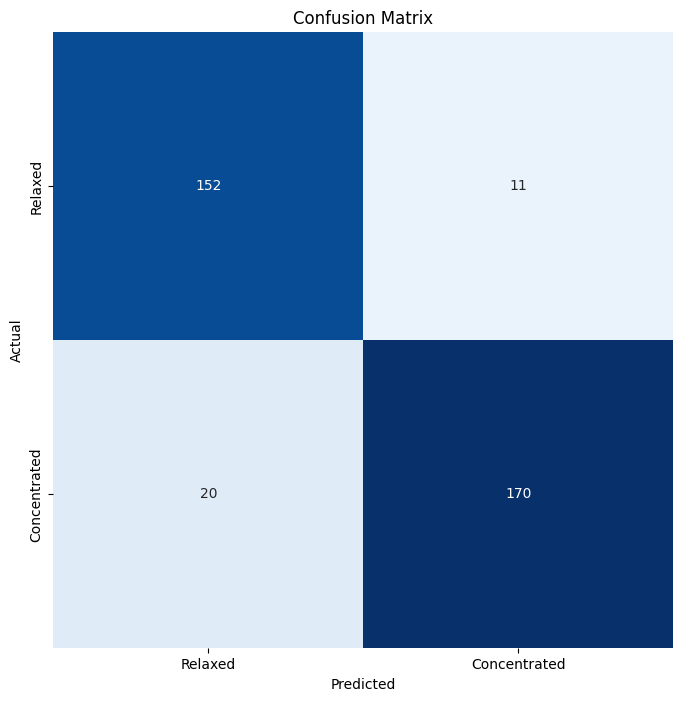

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = np.round(model.predict(X_test))
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",(cm))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, label_mapping.keys())
plt.yticks(np.arange(2) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

# assuming y_true and y_pred are your true and predicted binary labels respectively
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.913626089764288


In [66]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [67]:
# serialize model to JSON
modelbci0225_json = model.to_json()
with open("modelbci_demo3.json", "w") as json_file:
    json_file.write(modelbci0225_json)
# serialize weights to HDF5
model.save_weights("modelbci_demo3.h5")
model.save("modelbci_demo3")
print("Saved model to disk")

INFO:tensorflow:Assets written to: modelbci_demo3/assets


INFO:tensorflow:Assets written to: modelbci_demo3/assets


Saved model to disk


In [68]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("modelbci_demo3")

# Let's check:
np.testing.assert_allclose(model.predict(X_test), reconstructed_model.predict(X_test))

12/12 [==============================] - 3s 268ms/step


In [69]:
y_pred = np.round(model.predict(X_test))
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print("Classification Report:\n----------------------\n", clr)

12/12 [==============================] - 3s 269ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

     Relaxed       0.88      0.93      0.91       163
Concentrated       0.94      0.89      0.92       190

    accuracy                           0.91       353
   macro avg       0.91      0.91      0.91       353
weighted avg       0.91      0.91      0.91       353



In [70]:
x_pred = np.round(model.predict(X_test[:5]))
print(x_pred)
print(y_test[:5])

1/1 [==============================] - 0s 118ms/step
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]]
772     1.0
1047    0.0
72      1.0
319     1.0
1084    1.0
Name: Label, dtype: float64


In [71]:
data_2 = pd.read_csv('/Users/jessiexiong/Desktop/test_G/test-1.csv')
data_2

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,23.17343,73.09602,12.48188,12.73640,-9.94054,-12.99381,3.03906,4.92422,35.61753,78.51377,...,0.25937,0.33332,0.10022,0.06005,0.03745,0.03392,0.02988,0.02255,0.02451,1.0
1,10.51302,65.50734,0.33328,-3.81114,25.95490,37.04574,-30.11229,-32.72029,-81.45868,-52.94294,...,0.02735,0.18857,0.02557,0.01765,0.00797,0.00559,0.01261,0.00984,0.00924,1.0
2,4.02995,52.06117,16.99961,15.07133,-11.01543,-3.52962,-0.43597,-0.77867,5.11100,52.33702,...,0.24116,0.29891,0.09101,0.04814,0.03610,0.02679,0.02615,0.01682,0.01398,1.0
3,20.18224,42.80474,17.37798,12.06148,66.91855,-55.33170,11.05155,16.87594,-52.87894,79.49328,...,0.04320,0.29728,0.03877,0.01155,0.02255,0.01146,0.00834,0.01440,0.00408,1.0
4,5.22744,51.39857,17.16535,15.13029,-0.50294,-6.45154,-1.25766,-0.35127,8.96218,57.88684,...,0.12541,0.16563,0.04692,0.02343,0.01443,0.01577,0.00064,0.00997,0.01415,1.0
5,5.17381,53.56354,15.47534,14.10329,5.96854,-14.55953,3.64223,11.92096,2.40872,56.99546,...,0.07686,0.42178,0.04419,0.02810,0.02120,0.01918,0.01676,0.01758,0.00584,1.0
6,5.47867,44.78985,12.84100,0.11520,10.48127,1.74975,-4.37766,-17.25279,5.07995,46.65392,...,0.18616,0.23964,0.07152,0.03975,0.02785,0.02003,0.01882,0.01292,0.01532,1.0
7,4.07662,54.14763,15.64800,14.95890,-13.72800,-15.01284,3.67652,0.65904,21.85517,69.25792,...,0.10168,0.58730,0.07850,0.04352,0.01971,0.01940,0.02502,0.02773,0.03641,1.0
8,6.60595,42.28651,13.26230,13.03183,-8.19419,-6.74303,5.03511,42.76495,12.83464,54.42310,...,0.07326,0.45214,0.05589,0.02986,0.02181,0.00529,0.00437,0.01511,0.01272,1.0
9,14.59140,64.13534,13.89868,14.90997,-7.13482,-4.83757,-0.14088,-0.48505,16.09402,67.59839,...,0.06666,0.44526,0.05594,0.03127,0.02761,0.01857,0.01196,0.01456,0.00508,1.0


In [72]:
y_pred = data_2['Label'].copy()
X_pred = data_2.drop('Label', axis=1).copy()

In [73]:
x_pred = np.round(model.predict(X_pred))
print(np.count_nonzero(x_pred == 1.0))
print(np.count_nonzero(x_pred == 0.0))

2/2 [==============================] - 1s 359ms/step
49
0


In [74]:
data_3 = pd.read_csv('/Users/jessiexiong/Desktop/test_G/test-5.csv')
data_3

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-460.67190,-529.11892,-300.10960,-292.84254,33.98964,13.68768,43.16479,41.48340,-473.30051,-532.59836,...,0.04613,0.06296,0.02876,0.01562,0.01312,0.01045,0.00529,0.00783,0.01022,1.0
1,-435.16489,-504.02900,-258.54056,-259.53597,-10.81094,1.92464,-19.52517,-10.04870,-397.08599,-492.78702,...,0.02049,0.03136,0.01538,0.00576,0.00412,0.00695,0.00173,0.00526,0.00054,1.0
2,-441.62812,-505.05703,-278.99785,-282.72149,-26.65889,-43.09888,-29.25728,-45.66903,-405.90768,-429.74108,...,0.04209,0.04185,0.02310,0.01580,0.00952,0.00355,0.00479,0.00604,0.01330,1.0
3,-466.04491,-509.92216,-305.34972,-297.29431,75.43299,52.79868,81.91224,74.66453,-529.54178,-549.54481,...,0.03749,0.04895,0.01619,0.00250,0.01426,0.00615,0.00458,0.01042,0.01192,1.0
4,-464.10465,-524.08640,-299.47823,-291.18507,130.82859,64.61542,154.56856,140.57322,-459.36614,-523.50315,...,0.04200,0.05216,0.01591,0.00896,0.00890,0.00495,0.00445,0.00546,0.00040,1.0
5,-261.98610,-416.45978,-86.09653,-104.16082,-168.97963,-82.21464,-212.77512,-207.87786,-207.34136,-387.17816,...,0.00694,0.01703,0.00570,0.00679,0.00539,0.00421,0.00401,0.00253,0.00277,1.0
6,-456.64679,-507.47946,-281.82224,-275.79422,2.10187,43.30413,15.52025,18.05038,-457.26660,-528.77182,...,0.02560,0.05158,0.01487,0.01500,0.01450,0.01797,0.01212,0.01187,0.00606,1.0
7,-374.66624,-475.92777,-193.60555,-195.93771,-94.49116,-45.93499,-116.62074,-109.63311,-310.28728,-448.12257,...,0.03065,0.05782,0.01042,0.02125,0.00775,0.01531,0.02317,0.02086,0.01126,1.0
8,-507.07295,-547.53134,-346.19996,-332.66697,-45.35601,-17.88577,-61.55364,-57.93780,-461.21129,-531.44942,...,0.03036,0.03320,0.01280,0.00374,0.00432,0.00195,0.00391,0.00058,0.00541,1.0
9,-445.27323,-519.62350,-295.18705,-289.52917,73.84475,35.82003,74.24647,66.68782,-478.28690,-535.71347,...,0.04844,0.06418,0.02174,0.01668,0.01075,0.00566,0.00110,0.00840,0.00692,1.0


In [75]:
X_pred_2 = data_3.drop('Label', axis=1).copy()

In [76]:
import collections

In [78]:
x_pred_2 = np.round(model.predict(X_pred_2))
print(np.count_nonzero(x_pred_2 == 1.0))
print(np.count_nonzero(x_pred_2 == 0.0))

2/2 [==============================] - 1s 347ms/step
33
16
